In [342]:
N = 22
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
my_col = cols[N % 7]
cols[N % 7]

'Sleep_Hours'

Импорт библиотек

In [343]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

чтение датасета

In [344]:
filepath = "..\\datasets\\teen_phone_addiction_dataset.csv"
data = pd.read_csv(filepath)

извлечение данных выбранной колонки для работы и чтение 1-ых строк, просмор описания данных 

In [345]:
my_col_data = data[my_col]
my_col_data.head()

0    6.1
1    6.5
2    5.5
3    3.9
4    6.7
Name: Sleep_Hours, dtype: float64

In [346]:
my_col_data.describe()

count    3000.000000
mean        6.489767
std         1.490713
min         3.000000
25%         5.500000
50%         6.500000
75%         7.500000
max        10.000000
Name: Sleep_Hours, dtype: float64

Вычиление требуемых характеристик для колонки

In [347]:
mean = my_col_data.mean()
variance = my_col_data.var()
mode = my_col_data.mode()[0]  # можно поститать учитывая что данные округлены с точностью 0.1, количесво знаений 3000, а возможных до 100
median = my_col_data.median()
quantiles = my_col_data.quantile([0.25, 0.5, 0.75])
kurtosis = stats.kurtosis(my_col_data)
skewness = stats.skew(my_col_data)
iq_range = stats.iqr(my_col_data)

# Вывод результатов
print(f"Среднее: {mean}")
print(f"Дисперсия: {variance}")
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Квантили (0.25, 0.5, 0.75): {quantiles.values}")
print(f"Эксцесс: {kurtosis}")
print(f"Ассиметрия: {skewness}")
print(f"Интерквартильный размах: {iq_range}")

Среднее: 6.489766666666668
Дисперсия: 2.2222260208958544
Мода: 6.1
Медиана: 6.5
Квантили (0.25, 0.5, 0.75): [5.5 6.5 7.5]
Эксцесс: -0.2969486466071465
Ассиметрия: 0.011848322655812933
Интерквартильный размах: 2.0


Построение гистограммы и эмпирического распределения

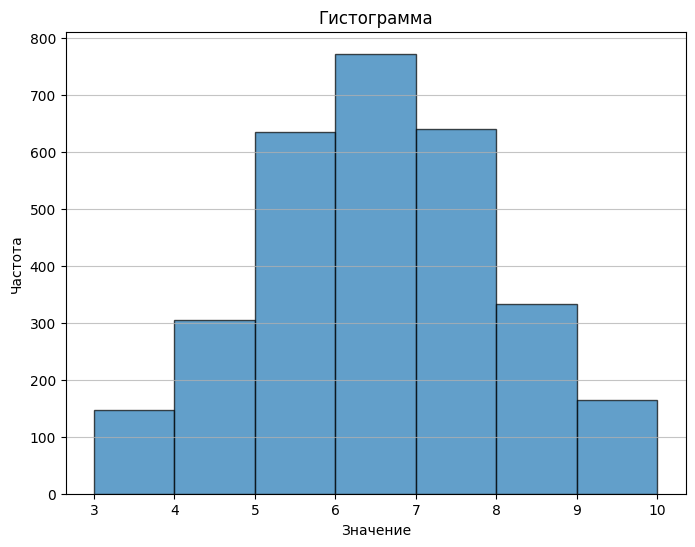

In [348]:
plt.figure(figsize=(8, 6))
plt.hist(my_col_data, bins=7, edgecolor='black', alpha=0.7)
plt.title('Гистограмма')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

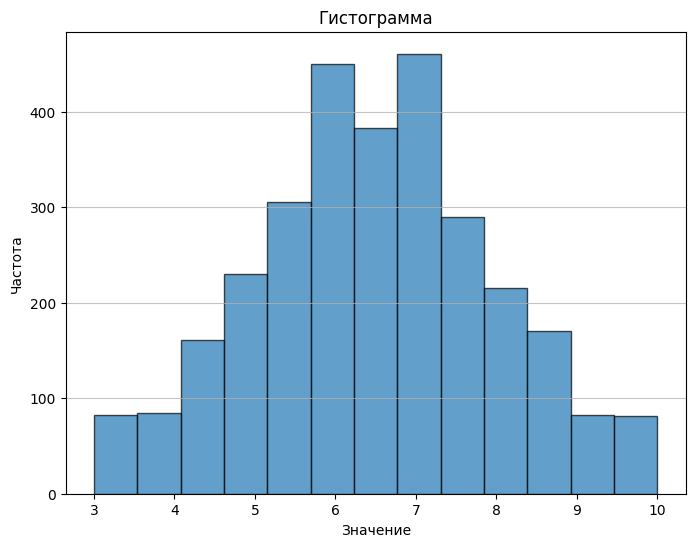

In [349]:
n = len(my_col_data)
num_bins = int(np.ceil(np.log2(n) + 1))

plt.figure(figsize=(8, 6))
plt.hist(my_col_data, bins=num_bins, edgecolor='black', alpha=0.7)
plt.title('Гистограмма')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

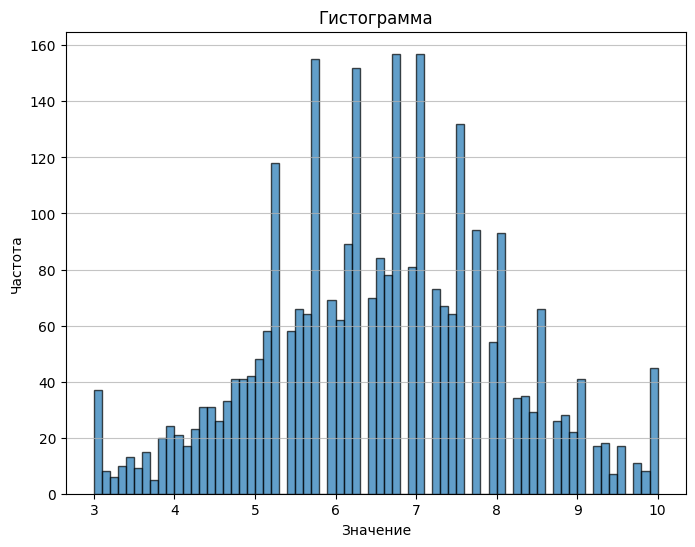

In [350]:
plt.figure(figsize=(8, 6))
plt.hist(my_col_data, bins=70, edgecolor='black', alpha=0.7)
plt.title('Гистограмма')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

Построение эмпирической функции распределения

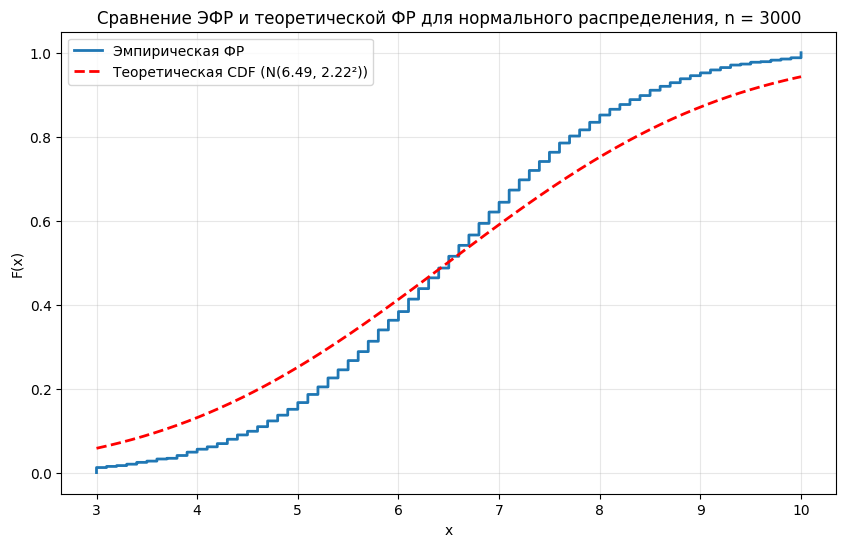

In [351]:

sorted_data = np.sort(my_col_data)
n = len(sorted_data)

ecdf_y = np.arange(1, n + 1) / n

x_theor = np.linspace(min(my_col_data), max(my_col_data), 3000)
cdf_theor = stats.norm.cdf(x_theor, loc=mean, scale=variance)

plt.figure(figsize=(10, 6))
plt.step(sorted_data, ecdf_y, where='post', label='Эмпирическая ФР', linewidth=2)
plt.plot(x_theor, cdf_theor, 'r--', label=f'Теоретическая CDF (N({mean:.2f}, {variance:.2f}²))', linewidth=2)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.ylim(-0.05, 1.05)
plt.title(f'Сравнение ЭФР и теоретической ФР для нормального распределения, n = {n}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Описание результатов пункта 1 
Судя по близкому расположению среднего (6.49), медианы (6.5) и моды (6.1), можем говорить о близости к симметричному распределению. Малый коэффициент асимметрии (0.012) также это подтверждает. Интерквартильный размах 2.0  согласуется с дисперсией 2.22, что также говорит о симметричности. Квантили [5.5, 6.5, 7.5] демонстрируют симметричное расположение вокруг медианы.

Значение эксцесса (-0.297) говорит о том, что распределение плосковершинно относительно нормального. 

То есть можного говорить о симметричности и плосковершинности распределения.

Гистограмма также показывает, что распределение симметрично. А на высоком количестве бинов видна пслосковершинность.

Эмперическая функция распрделения соответсвует симметричному распределнию, так как симметрична  относитель точки (медиана, 0.5). Можно отметить что эфр довольна близка к теоретической функции нормального распределения 


# Проверка данных на нормальность 

In [352]:
def chisquare_test_norm(observed):
    mu = np.mean(observed)
    std = np.std(observed, ddof=1)  # несмещенная оценка
    
    n = len(observed)
    num_bins = int(np.ceil(np.log2(n) + 1))
    
    observed_freq, bins = np.histogram(observed, bins=num_bins)
    
    expected_freq = np.array([
        stats.norm.cdf(bins[i + 1], mu, std) - stats.norm.cdf(bins[i], mu, std) 
        for i in range(num_bins)
    ]) * n
    
    expected_freq = np.where(expected_freq == 0, 1e-10, expected_freq)
    
    statistic = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
    
    # Степени свободы: k - 1 - 2 
    dof = num_bins - 3
    p_value = 1 - stats.chi2.cdf(statistic, dof)
    
    return dof, statistic, p_value

In [353]:
degrees_of_freedom, chi2_stat, p_value = chisquare_test_norm(my_col_data)

print(f"Степени свободы: {degrees_of_freedom}")
print(f"Статистика хи-квадрат: {chi2_stat}")
print(f"P-значение: {p_value:.2f}")

Степени свободы: 10
Статистика хи-квадрат: 107.36617571779418
P-значение: 0.00


In [354]:
alpha = 0.05

# Тест асимметрии
skew_stat, skew_p = stats.skewtest(my_col_data)
print("Тест асимметрии:")
print(f"Статистика: {skew_stat:.4f}")
print(f"P-значение: {skew_p:.4f}")
print(f"Отказ от нормальности: {'Да' if skew_p < alpha else 'Нет'}")

# Тест эксцесса
kurt_stat, kurt_p = stats.kurtosistest(my_col_data)
print("\nТест эксцесса:")
print(f"Статистика: {kurt_stat:.4f}")
print(f"P-значение: {kurt_p:.4f}")
print(f"Отказ от нормальности: {'Да' if kurt_p < alpha else 'Нет'}")

Тест асимметрии:
Статистика: 0.2656
P-значение: 0.7906
Отказ от нормальности: Нет

Тест эксцесса:
Статистика: -3.8589
P-значение: 0.0001
Отказ от нормальности: Да


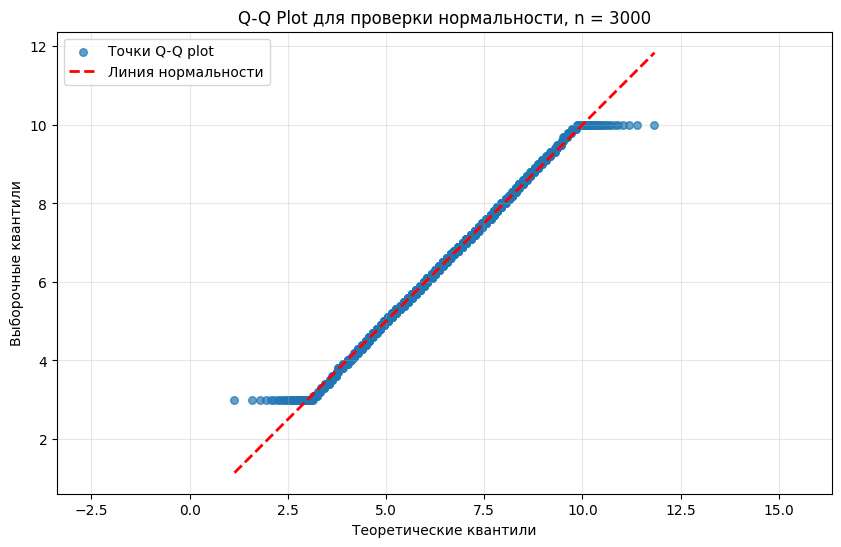

In [355]:
sorted_data = np.sort(my_col_data)
n = len(sorted_data)

mean = np.mean(my_col_data) 
variance = np.var(my_col_data)  

theoretical_quantiles = stats.norm.ppf((np.arange(1, n + 1) - 0.5) / n, loc=mean, scale=np.sqrt(variance))

plt.figure(figsize=(10, 6))
plt.scatter(theoretical_quantiles, sorted_data, alpha=0.7, s=30, label='Точки Q-Q plot')

x_line = np.linspace(min(theoretical_quantiles), max(theoretical_quantiles), 100)
y_line = x_line
plt.plot(x_line, y_line, 'r--', label='Линия нормальности', linewidth=2)

plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.title(f'Q-Q Plot для проверки нормальности, n = {n}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.xlim(min(theoretical_quantiles) - 0.5, max(theoretical_quantiles) + 0.5)
plt.ylim(min(sorted_data) - 0.5, max(sorted_data) + 0.5)

plt.axis('equal')
plt.show()

# Анализ проверки на нормальность
Хи-квадрат тест и тест по эксцессу показали, что данные не нормальны, тест по  ассиметрии не отвергает эту гипотезу. Q-Q Plot показывает что данные приходят из усечённого нормального распределения

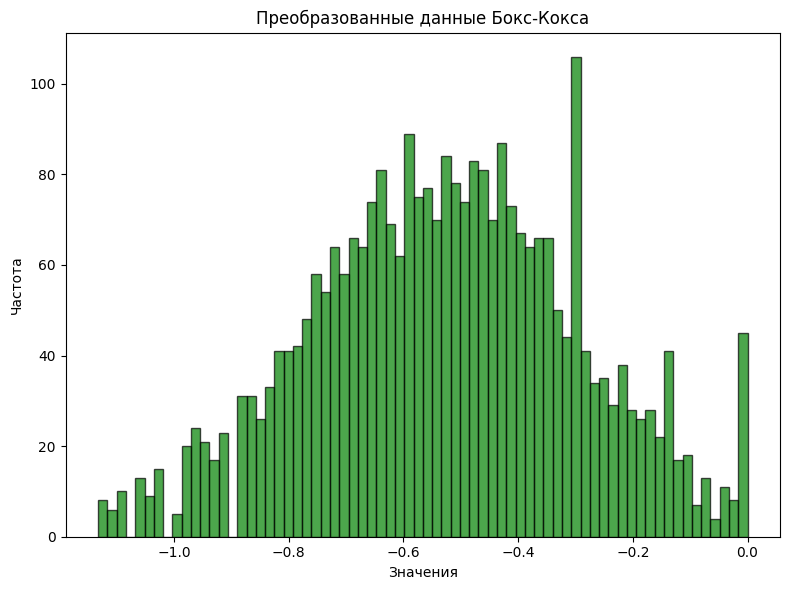

In [356]:

from sklearn.preprocessing import  MinMaxScaler


Q1 = np.percentile(my_col_data, 25)
Q3 = np.percentile(my_col_data, 75)
IQR = Q3 - Q1
filtered_data = my_col_data[(my_col_data >= Q1 - 1.5 * IQR) & (my_col_data <= Q3 + 1.5 * IQR)]

normalizer = MinMaxScaler()
normalized_data = normalizer.fit_transform(filtered_data.values.reshape(-1, 1))


boxcox_filtered_data, lambda_ = stats.boxcox(normalized_data[normalized_data > 0])


plt.figure(figsize=(8, 6))
plt.hist(boxcox_filtered_data, bins=70, alpha=0.7, color='green', edgecolor='black')
plt.title('Преобразованные данные Бокс-Кокса')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


In [357]:
my_col_data2 = pd.Series(boxcox_filtered_data)
my_col_data2.head()

0   -0.585606
1   -0.522121
2   -0.683068
3   -0.963438
4   -0.490765
dtype: float64

In [358]:
my_col_data2.describe()

count    2.963000e+03
mean    -5.240966e-01
std      2.305275e-01
min     -1.132484e+00
25%     -6.830677e-01
50%     -5.221213e-01
75%     -3.675715e-01
max     -2.220446e-16
dtype: float64

Вычиление требуемых характеристик для колонки

In [359]:
mean = my_col_data2.mean()
variance = my_col_data2.var()
mode = my_col_data2.mode()[0]  # можно поститать учитывая что данные округлены с точностью 0.1, количесво знаений 3000, а возможных до 100
median = my_col_data2.median()
quantiles = my_col_data2.quantile([0.25, 0.5, 0.75])
kurtosis = stats.kurtosis(my_col_data2)
skewness = stats.skew(my_col_data2)
iq_range = stats.iqr(my_col_data2)

# Вывод результатов
print(f"Среднее: {mean}")
print(f"Дисперсия: {variance}")
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Квантили (0.25, 0.5, 0.75): {quantiles.values}")
print(f"Эксцесс: {kurtosis}")
print(f"Ассиметрия: {skewness}")
print(f"Интерквартильный размах: {iq_range}")

Среднее: -0.5240966376307544
Дисперсия: 0.053142927855129043
Мода: -0.585606436472373
Медиана: -0.5221212718669843
Квантили (0.25, 0.5, 0.75): [-0.68306771 -0.52212127 -0.3675715 ]
Эксцесс: -0.30254593454590983
Ассиметрия: -0.06957879171260668
Интерквартильный размах: 0.3154962013754124


Построение гистограммы и эмпирического распределения

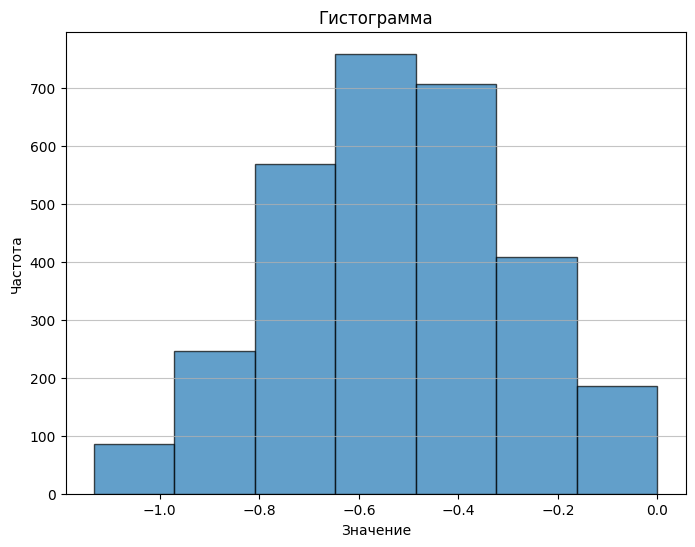

In [360]:
plt.figure(figsize=(8, 6))
plt.hist(my_col_data2, bins=7, edgecolor='black', alpha=0.7)
plt.title('Гистограмма')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

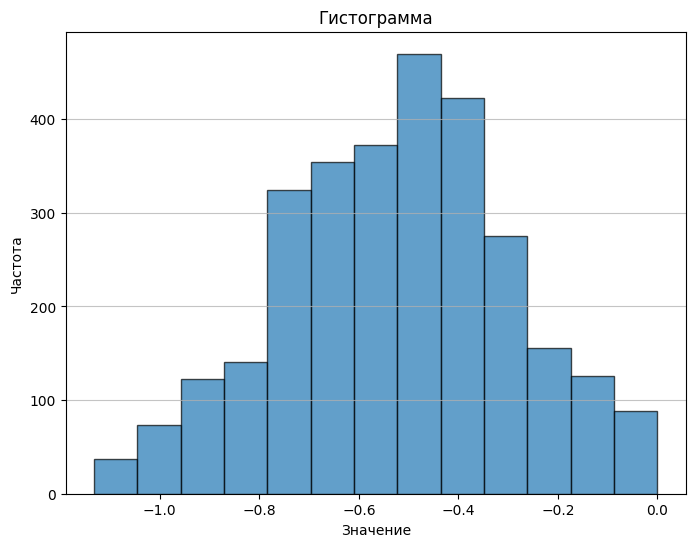

In [361]:
n = len(my_col_data)
num_bins = int(np.ceil(np.log2(n) + 1))

plt.figure(figsize=(8, 6))
plt.hist(my_col_data2, bins=num_bins, edgecolor='black', alpha=0.7)
plt.title('Гистограмма')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

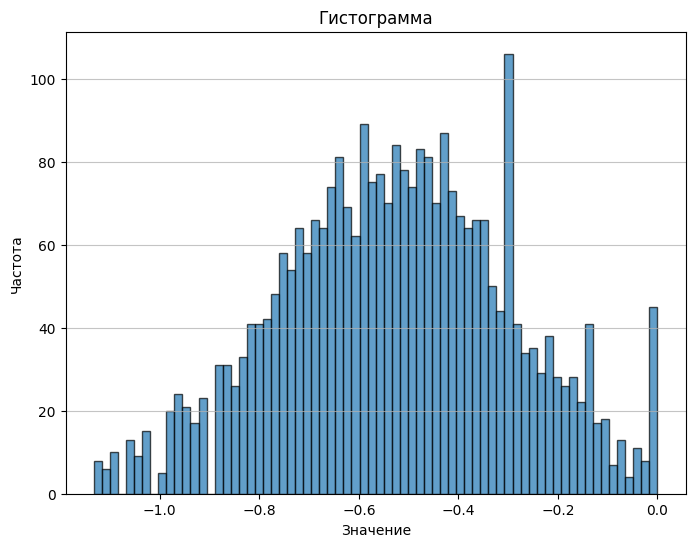

In [362]:
plt.figure(figsize=(8, 6))
plt.hist(my_col_data2, bins=70, edgecolor='black', alpha=0.7)
plt.title('Гистограмма')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

Построение эмпирической функции распределения

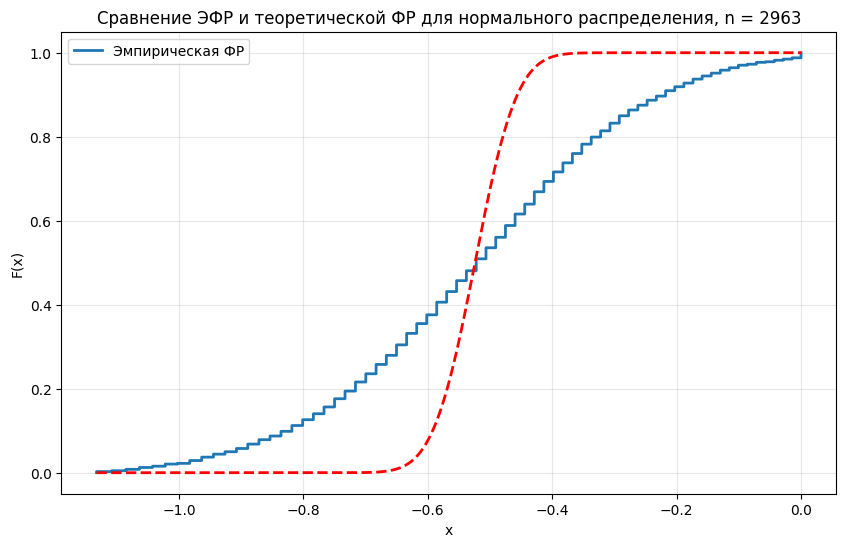

In [363]:

sorted_data = np.sort(my_col_data2)
n = len(sorted_data)

ecdf_y = np.arange(1, n + 1) / n

x_theor = np.linspace(min(my_col_data2), max(my_col_data2), 3000)
cdf_theor = stats.norm.cdf(x_theor, loc=mean, scale=variance)

plt.figure(figsize=(10, 6))
plt.step(sorted_data, ecdf_y, where='post', label='Эмпирическая ФР', linewidth=2)
plt.plot(x_theor, cdf_theor, 'r--', linewidth=2)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.ylim(-0.05, 1.05)
plt.title(f'Сравнение ЭФР и теоретической ФР для нормального распределения, n = {n}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Описание результатов пункта 1 
Судя по близкому расположению среднего (6.49), медианы (6.5) и моды (6.1), можем говорить о близости к симметричному распределению. Малый коэффициент асимметрии (0.012) также это подтверждает. Интерквартильный размах 2.0  согласуется с дисперсией 2.22, что также говорит о симметричности. Квантили [5.5, 6.5, 7.5] демонстрируют симметричное расположение вокруг медианы.

Значение эксцесса (-0.297) говорит о том, что распределение плосковершинно относительно нормального. 

То есть можного говорить о симметричности и плосковершинности распределения.

Гистограмма также показывает, что распределение симметрично. А на высоком количестве бинов видна пслосковершинность.

Эмперическая функция распрделения соответсвует симметричному распределнию, так как симметрична  относитель точки (медиана, 0.5). Можно отметить что эфр довольна близка к теоретической функции нормального распределения 


# Проверка данных на нормальность 

In [364]:
def chisquare_test_norm(observed):
    mu = np.mean(observed)
    std = np.std(observed, ddof=1)  # несмещенная оценка
    
    n = len(observed)
    num_bins = int(np.ceil(np.log2(n) + 1))
    
    observed_freq, bins = np.histogram(observed, bins=num_bins)
    
    expected_freq = np.array([
        stats.norm.cdf(bins[i + 1], mu, std) - stats.norm.cdf(bins[i], mu, std) 
        for i in range(num_bins)
    ]) * n
    
    expected_freq = np.where(expected_freq == 0, 1e-10, expected_freq)
    
    statistic = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
    
    # Степени свободы: k - 1 - 2 
    dof = num_bins - 3
    p_value = 1 - stats.chi2.cdf(statistic, dof)
    
    return dof, statistic, p_value

In [365]:
degrees_of_freedom, chi2_stat, p_value = chisquare_test_norm(my_col_data2)

print(f"Степени свободы: {degrees_of_freedom}")
print(f"Статистика хи-квадрат: {chi2_stat}")
print(f"P-значение: {p_value:.2f}")

Степени свободы: 10
Статистика хи-квадрат: 88.53016572792227
P-значение: 0.00


In [366]:
alpha = 0.05

# Тест асимметрии
skew_stat, skew_p = stats.skewtest(my_col_data2)
print("Тест асимметрии:")
print(f"Статистика: {skew_stat:.4f}")
print(f"P-значение: {skew_p:.4f}")
print(f"Отказ от нормальности: {'Да' if skew_p < alpha else 'Нет'}")

# Тест эксцесса
kurt_stat, kurt_p = stats.kurtosistest(my_col_data2)
print("\nТест эксцесса:")
print(f"Статистика: {kurt_stat:.4f}")
print(f"P-значение: {kurt_p:.4f}")
print(f"Отказ от нормальности: {'Да' if kurt_p < alpha else 'Нет'}")

Тест асимметрии:
Статистика: -1.5482
P-значение: 0.1216
Отказ от нормальности: Нет

Тест эксцесса:
Статистика: -3.9216
P-значение: 0.0001
Отказ от нормальности: Да


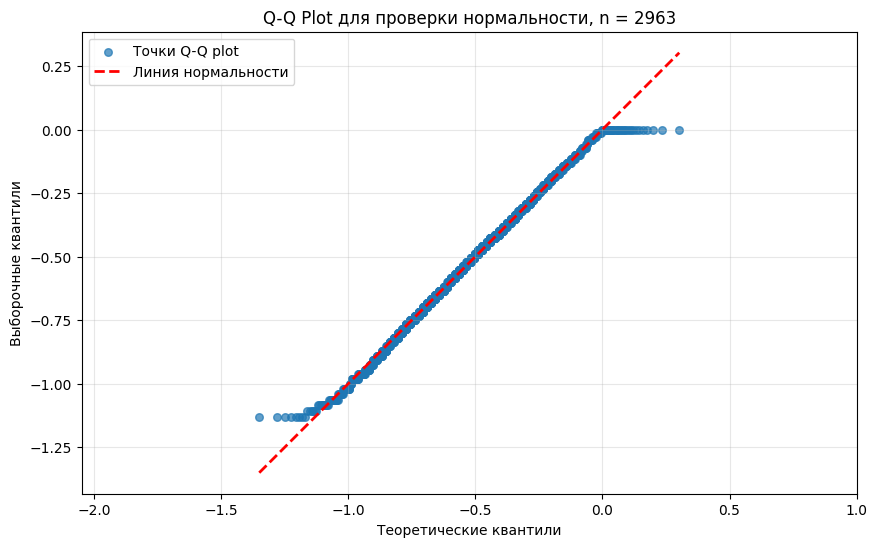

In [367]:
sorted_data = np.sort(my_col_data2)
n = len(sorted_data)

mean = np.mean(sorted_data) 
variance = np.var(sorted_data)  

theoretical_quantiles = stats.norm.ppf((np.arange(1, n + 1) - 0.5) / n, loc=mean, scale=np.sqrt(variance))

plt.figure(figsize=(10, 6))
plt.scatter(theoretical_quantiles, sorted_data, alpha=0.7, s=30, label='Точки Q-Q plot')

x_line = np.linspace(min(theoretical_quantiles), max(theoretical_quantiles), 100)
y_line = x_line
plt.plot(x_line, y_line, 'r--', label='Линия нормальности', linewidth=2)

plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.title(f'Q-Q Plot для проверки нормальности, n = {n}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.xlim(min(theoretical_quantiles) - 0.5, max(theoretical_quantiles) + 0.5)
plt.ylim(min(sorted_data) - 0.5, max(sorted_data) + 0.5)

plt.axis('equal')
plt.show()

# Анализ приведения к нормальному
Видим что по некоторым параметрам распределение стало только хуже

# Сравнение с усечённым нормальным

In [368]:
import numpy as np
from scipy import stats

def chisquare_test_truncnorm(observed):
    mu = np.mean(observed)
    std = np.std(observed, ddof=1)  # несмещенная оценка
    
    lower = np.min(observed)
    upper = np.max(observed)
    
    
    
    n = len(observed)
    num_bins = int(np.ceil(np.log2(n) + 1)) 
    
    observed_freq, bins = np.histogram(observed, bins=num_bins)
    
    # параметры усечённого нормального
    a, b = (lower - mu) / std, (upper - mu) / std
    dist = stats.truncnorm(a, b, loc=mu, scale=std)
    
    expected_freq = np.array([
        dist.cdf(bins[i + 1]) - dist.cdf(bins[i])
        for i in range(num_bins)
    ]) * n
    
    expected_freq = np.where(expected_freq < 1e-10, 1e-10, expected_freq)
    
    statistic = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
    
    dof = num_bins - 3  # k - 1 - 2 параметра
    if dof <= 0:
        raise ValueError("Недостаточно интервалов для χ²-теста.")
    
    p_value = 1 - stats.chi2.cdf(statistic, dof)
    
    return dof, statistic, p_value


In [369]:
degrees_of_freedom, chi2_stat, p_value = chisquare_test_truncnorm(my_col_data2)

print(f"Степени свободы: {degrees_of_freedom}")
print(f"Статистика хи-квадрат: {chi2_stat}")
print(f"P-значение: {p_value:.2f}")

Степени свободы: 10
Статистика хи-квадрат: 86.41801468183898
P-значение: 0.00


In [374]:


def check_truncnorm_fit(data, n_sim=100000):
       
    lower = np.min(data)
    upper = np.max(data)
    
    mu, std = np.mean(data), np.std(data, ddof=1)
    skew_emp = stats.skew(data)
    excess_emp = stats.kurtosis(data, fisher=True)  # fisher=True => эксцесс=0 для нормального
    
    # параметры усечённого нормального
    a, b = (lower - mu) / std, (upper - mu) / std
    dist = stats.truncnorm(a, b, loc=mu, scale=std)
    
    # симулируем теоретическое распределение
    sim = dist.rvs(size=n_sim, random_state=42)
    skew_sim = stats.skew(sim)
    excess_sim = stats.kurtosis(sim, fisher=True)
    
    result = {
        "empirical": {"skewness": skew_emp, "excess": excess_emp},
        "truncnorm": {"skewness": skew_sim, "excess": excess_sim}
    }
    
    return result


In [376]:
res = check_truncnorm_fit(my_col_data2)
print("Эмпирические данные:", res["empirical"])
print("Теоретическая усечённая нормаль:", res["truncnorm"])


Эмпирические данные: {'skewness': np.float64(-0.06957879171260668), 'excess': np.float64(-0.30254593454590983)}
Теоретическая усечённая нормаль: {'skewness': np.float64(-0.07212144499766471), 'excess': np.float64(-0.39436158060547166)}


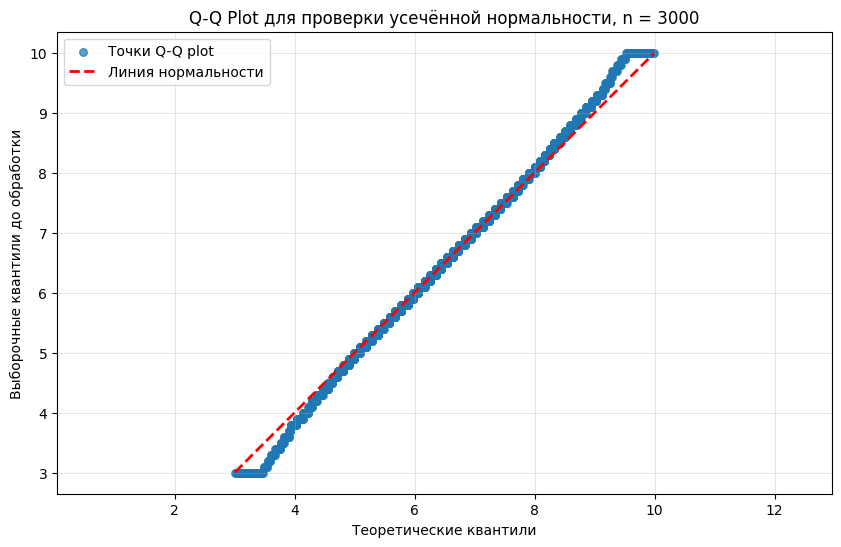

In [377]:
sorted_data = np.sort(my_col_data)
n = len(sorted_data)

mean = np.mean(sorted_data) 
variance = np.var(sorted_data)  
mu = np.mean(sorted_data)
std = np.std(sorted_data, ddof=1)  # несмещенная оценка

lower = np.min(sorted_data)
upper = np.max(sorted_data)


# параметры усечённого нормального
a, b = (lower - mu) / std, (upper - mu) / std

theoretical_quantiles = stats.truncnorm.ppf((np.arange(1, n + 1) - 0.5) / n, a, b, loc=mu, scale=std)

plt.figure(figsize=(10, 6))
plt.scatter(theoretical_quantiles, sorted_data, alpha=0.7, s=30, label='Точки Q-Q plot')

x_line = np.linspace(min(theoretical_quantiles), max(theoretical_quantiles), 100)
y_line = x_line
plt.plot(x_line, y_line, 'r--', label='Линия нормальности', linewidth=2)

plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили до обработки')
plt.title(f'Q-Q Plot для проверки усечённой нормальности, n = {n}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.xlim(min(theoretical_quantiles) - 0.5, max(theoretical_quantiles) + 0.5)
plt.ylim(min(sorted_data) - 0.5, max(sorted_data) + 0.5)

plt.axis('equal')
plt.show()

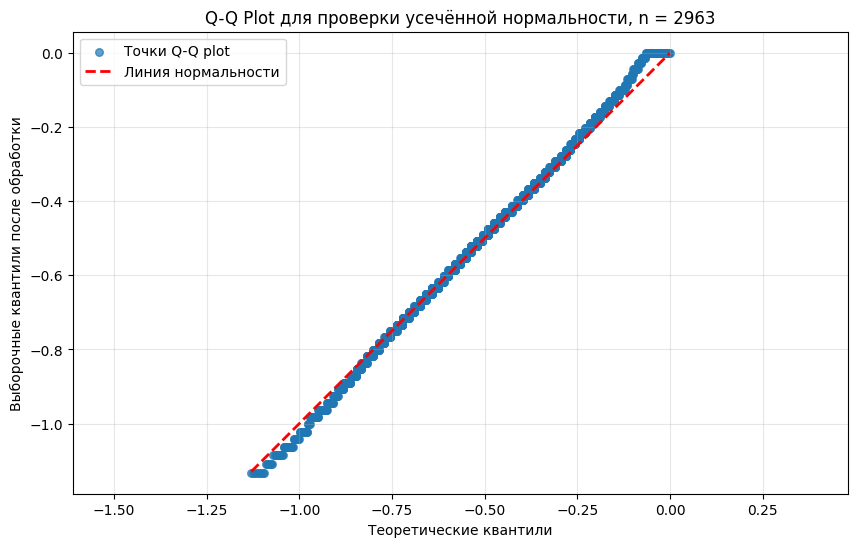

In [378]:
sorted_data = np.sort(my_col_data2)
n = len(sorted_data)

mean = np.mean(sorted_data) 
variance = np.var(sorted_data)  
mu = np.mean(sorted_data)
std = np.std(sorted_data, ddof=1)  # несмещенная оценка

lower = np.min(sorted_data)
upper = np.max(sorted_data)


# параметры усечённого нормального
a, b = (lower - mu) / std, (upper - mu) / std
dist = stats.truncnorm(a, b, loc=mu, scale=std)

theoretical_quantiles = stats.truncnorm.ppf((np.arange(1, n + 1) - 0.5) / n, a, b, loc=mu, scale=std)

plt.figure(figsize=(10, 6))
plt.scatter(theoretical_quantiles, sorted_data, alpha=0.7, s=30, label='Точки Q-Q plot')

x_line = np.linspace(min(theoretical_quantiles), max(theoretical_quantiles), 100)
y_line = x_line
plt.plot(x_line, y_line, 'r--', label='Линия нормальности', linewidth=2)

plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили после обработки')
plt.title(f'Q-Q Plot для проверки усечённой нормальности, n = {n}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.xlim(min(theoretical_quantiles) - 0.5, max(theoretical_quantiles) + 0.5)
plt.ylim(min(sorted_data) - 0.5, max(sorted_data) + 0.5)

plt.axis('equal')
plt.show()

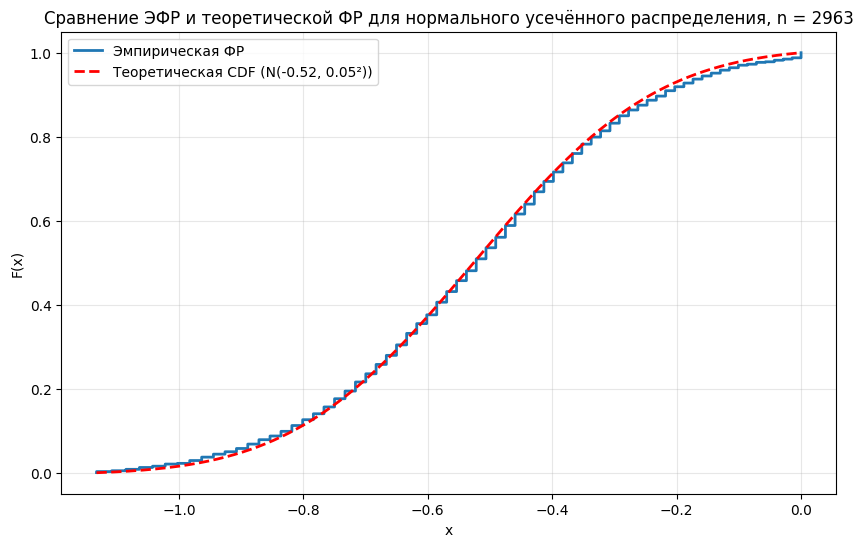

In [382]:
sorted_data = np.sort(my_col_data2)
n = len(sorted_data)

mean = np.mean(sorted_data) 
variance = np.var(sorted_data)  
mu = np.mean(sorted_data)
std = np.std(sorted_data, ddof=1)  # несмещенная оценка

lower = np.min(sorted_data)
upper = np.max(sorted_data)


# параметры усечённого нормального
a, b = (lower - mu) / std, (upper - mu) / std
dist = stats.truncnorm(a, b, loc=mu, scale=std)

ecdf_y = np.arange(1, n + 1) / n

x_theor = np.linspace(min(sorted_data), max(sorted_data), 3000)
cdf_theor = stats.truncnorm.cdf(x_theor, a, b, loc=mu, scale=std)

plt.figure(figsize=(10, 6))
plt.step(sorted_data, ecdf_y, where='post', label='Эмпирическая ФР', linewidth=2)
plt.plot(x_theor, cdf_theor, 'r--', label=f'Теоретическая CDF (N({mean:.2f}, {variance:.2f}²))', linewidth=2)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.ylim(-0.05, 1.05)
plt.title(f'Сравнение ЭФР и теоретической ФР для нормального усечённого распределения, n = {n}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Анализ проверки на усечённую нормальность
Хи-квадрат тест показывает все равно отвеграет гипотезу о о том что данные нормальны, эксцесс близок к теоретическому, тест по  ассиметрии не отвергает эту гипотезу
По QQ-plot видно что распределение довольно близко к нормальному, но заметно отличается на концах. Видно что после обработки получилось исправить 1 конец. Эмперическая функция распределения совпадает с теоретической.

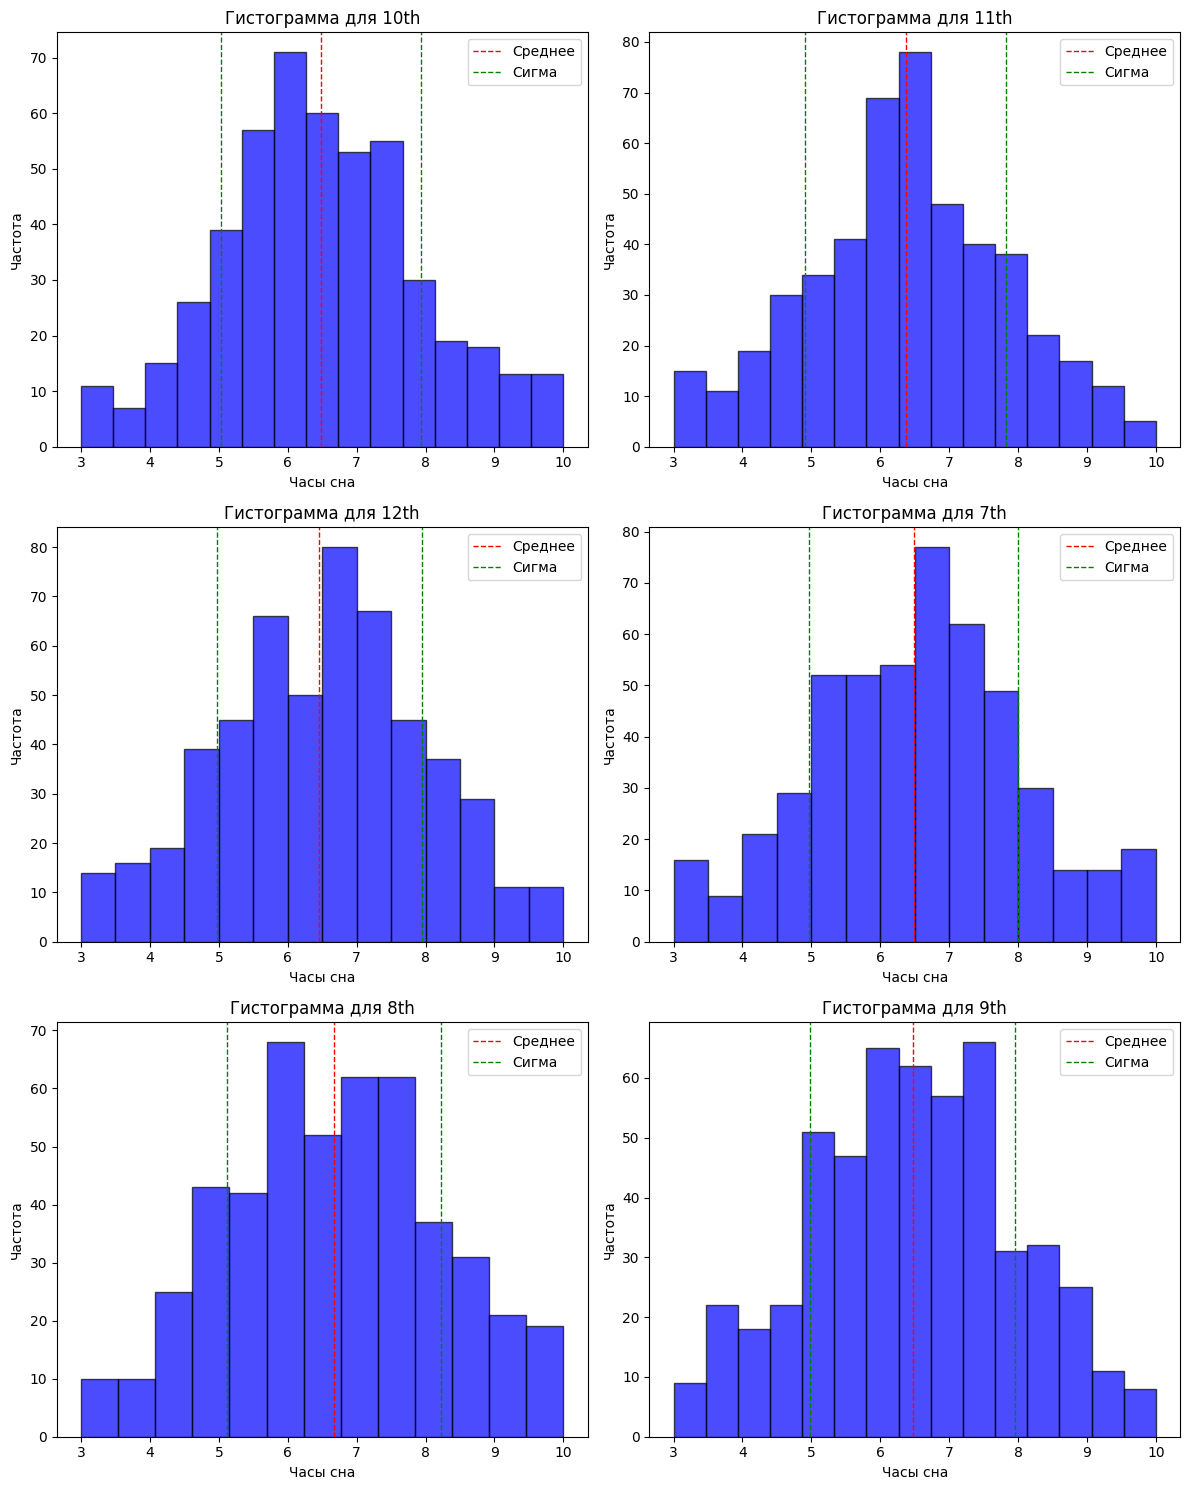

  School_Grade      mean       var
0         10th  6.488296  2.102064
1         11th  6.367432  2.113079
2         12th  6.459735  2.201804
3          7th  6.483702  2.287617
4          8th  6.675311  2.406853
5          9th  6.468441  2.196945


In [380]:
grouped = data.groupby('School_Grade')


num_groups = len(grouped)
cols = 2  
rows = (num_groups + cols - 1) // cols  


fig, axs = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axs = axs.flatten()  

for ax, (name, group) in zip(axs, grouped):
    ax.hist(group['Sleep_Hours'], bins='auto', alpha=0.7, color='blue', edgecolor='black')
    ax.set_title(f'Гистограмма для {name}')
    ax.set_xlabel('Часы сна')
    ax.set_ylabel('Частота')
    ax.axvline(group['Sleep_Hours'].mean(), color='red', linestyle='dashed', linewidth=1, label='Среднее')
    ax.axvline(group['Sleep_Hours'].mean() + group['Sleep_Hours'].std(), color='green', linestyle='dashed', linewidth=1, label='Сигма')
    ax.axvline(group['Sleep_Hours'].mean() - group['Sleep_Hours'].std(), color='green', linestyle='dashed', linewidth=1)
    ax.legend()

for i in range(num_groups, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


statistics = grouped['Sleep_Hours'].agg(['mean', 'var']).reset_index()
print(statistics)

# Анализ распределений в разных группах
Среднее и дисперсия в группах отличаются незначительно. Распределения всех групп в целом около нормальные (усечённые)